In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_name="C:/Users/Admin/Documents/Lab_3/Automobile_data.csv"
fall=pd.read_csv(file_name,sep=",")

#Вдалили не потрібні строки с price '?'
fall=fall[ fall['price'] !='?']
fall['price']= pd.to_numeric(fall["price"])
#fall['price']= pd.to_numeric(fall["price"].apply(lambda x:"0" if x=='?' else x))
fall['peak-rpm']= pd.to_numeric(fall["peak-rpm"].apply(lambda x:"0" if x=='?' else x))
fall['horsepower']= pd.to_numeric(fall["horsepower"].apply(lambda x:"0" if x=='?' else x))
fall['normalized-losses']= pd.to_numeric(fall["normalized-losses"].apply(lambda x:"0" if x=='?' else x))
fall['bore']= pd.to_numeric(fall["bore"].apply(lambda x:"0" if x=='?' else x))
fall['stroke']= pd.to_numeric(fall["stroke"].apply(lambda x:"0" if x=='?' else x))
print(fall.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object


In [6]:
print(fall.head())

   symboling  normalized-losses         make fuel-type aspiration  \
0          3                  0  alfa-romero       gas        std   
1          3                  0  alfa-romero       gas        std   
2          1                  0  alfa-romero       gas        std   
3          2                164         audi       gas        std   
4          2                164         audi       gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine-size  fuel-system  bore  stroke compression-ratio horsepower  \
0          130         mpfi  3.47    2.68       

data1: mean=11466.518 stdv=5785.770
data2: mean=122.000 stdv=35.334


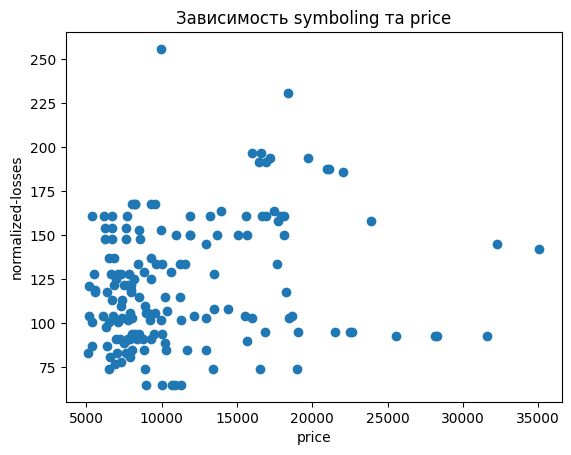

     price  normalized-losses
0     5118               83.0
1     5151              121.0
2     5195              104.0
3     5348               87.0
4     5389              161.0
..     ...                ...
145  28176               93.0
146  28248               93.0
147  31600               93.0
148  32250              145.0
149  35056              142.0

[150 rows x 2 columns]


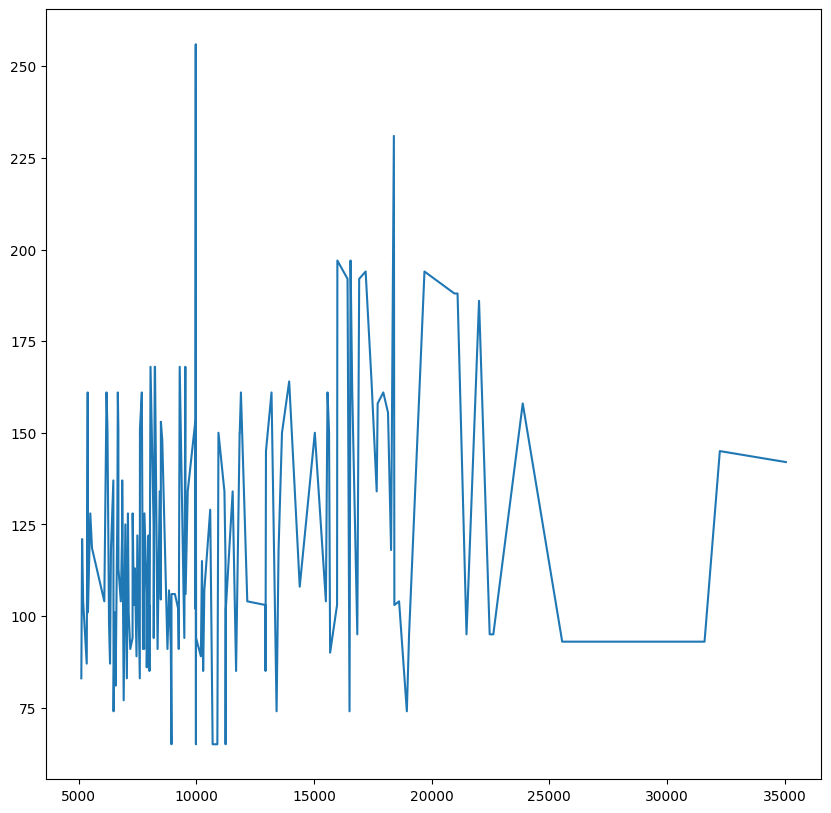

In [7]:
# generate related variables
from numpy import mean
from numpy import std

fall_new=fall[ fall['normalized-losses']>0] 

# prepare data
data1 = fall_new['price']
data2 = fall_new['normalized-losses']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.title('Зависимость symboling та price')
plt.xlabel('price')
plt.ylabel('normalized-losses')
plt.scatter(data1, data2)
plt.show()
#mean - середне
fall1=fall_new.groupby(["price"], as_index=False)["normalized-losses"].mean()
print(fall1)
data1 = fall1['price']
data2 = fall1['normalized-losses']
plt.figure(figsize=[10,10])
plt.plot(data1, data2)
plt.show()

data1: mean=13207.129 stdv=7927.273
data2: mean=0.841 stdv=1.252


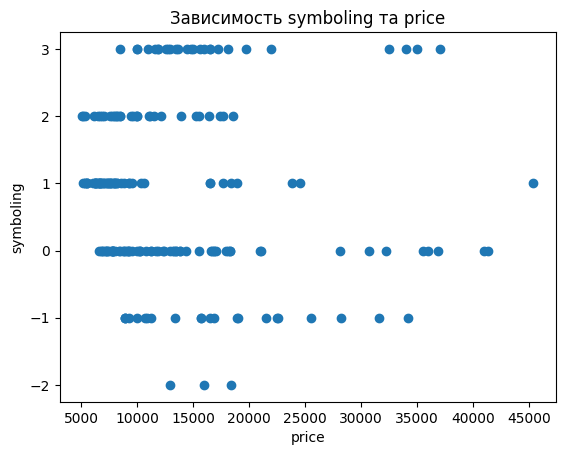

     price  symboling
0     5118        2.0
1     5151        2.0
2     5195        1.0
3     5348        1.0
4     5389        2.0
..     ...        ...
181  36880        0.0
182  37028        3.0
183  40960        0.0
184  41315        0.0
185  45400        1.0

[186 rows x 2 columns]


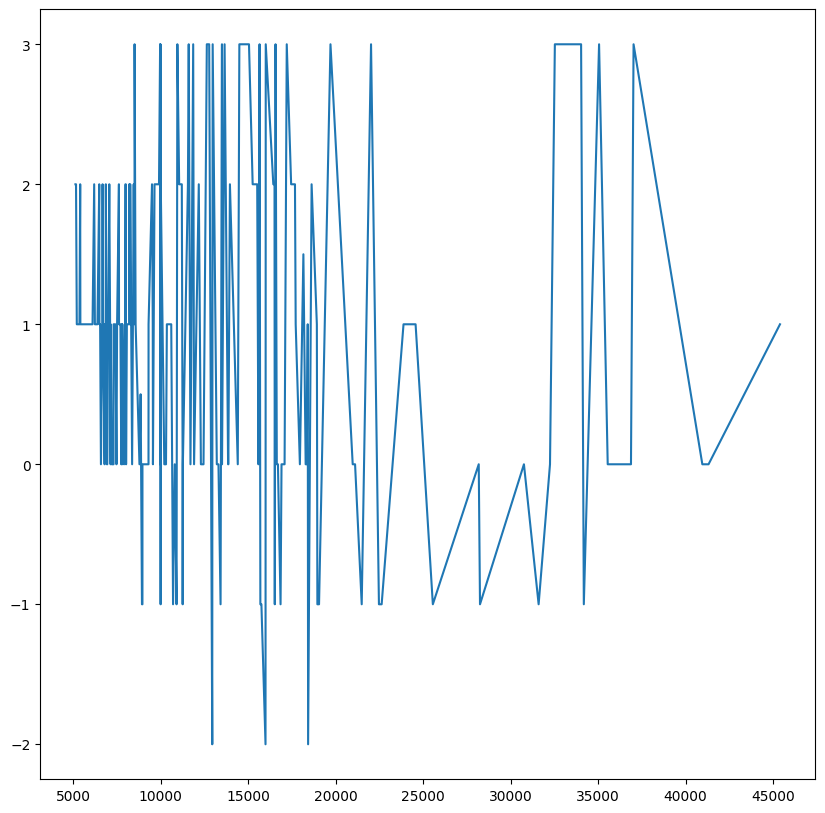

In [5]:
from numpy import mean
from numpy import std


# prepare data
data1 = fall['price']
data2 = fall['symboling']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
plt.title('Зависимость symboling та price')
plt.xlabel('price')
plt.ylabel('symboling')
plt.scatter(data1, data2)
plt.show()
#mean - середне
fall1=fall.groupby(["price"], as_index=False)["symboling"].mean()
print(fall1)
data1 = fall1['price']
data2 = fall1['symboling']
plt.figure(figsize=[10,10])
plt.plot(data1, data2)
plt.show()

data10: mean=12916.409 stdv=7912.973
data20: mean=104.348 stdv=39.365
data11: mean=15838.150 stdv=7563.360
data21: mean=84.450 stdv=25.301


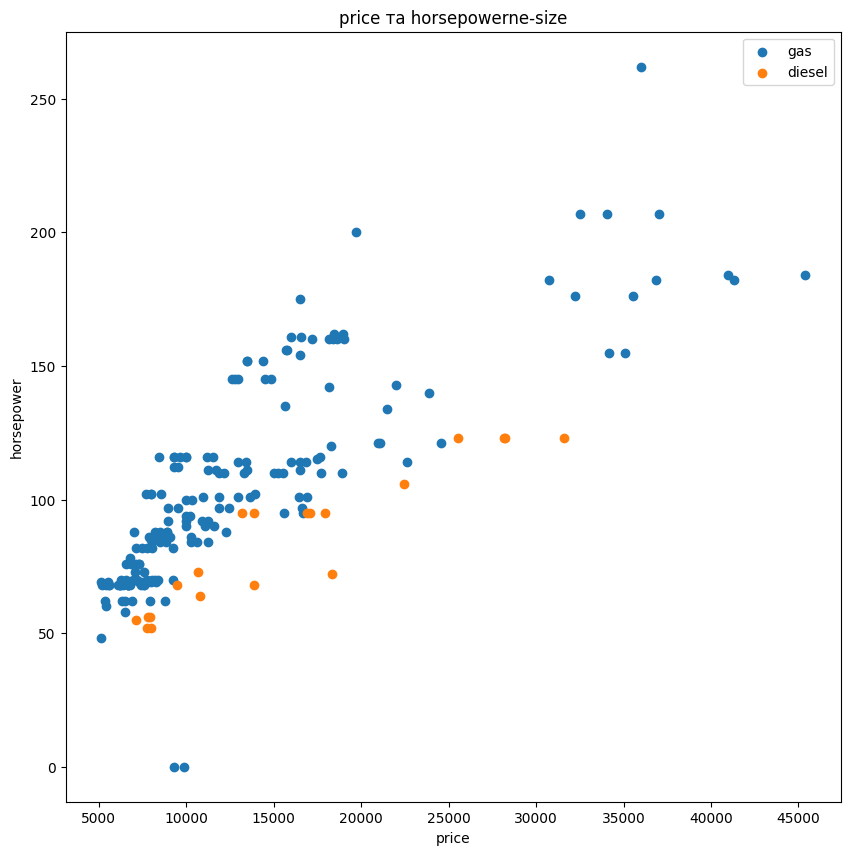

  fuel-type  price
0    diesel     20
1       gas    181


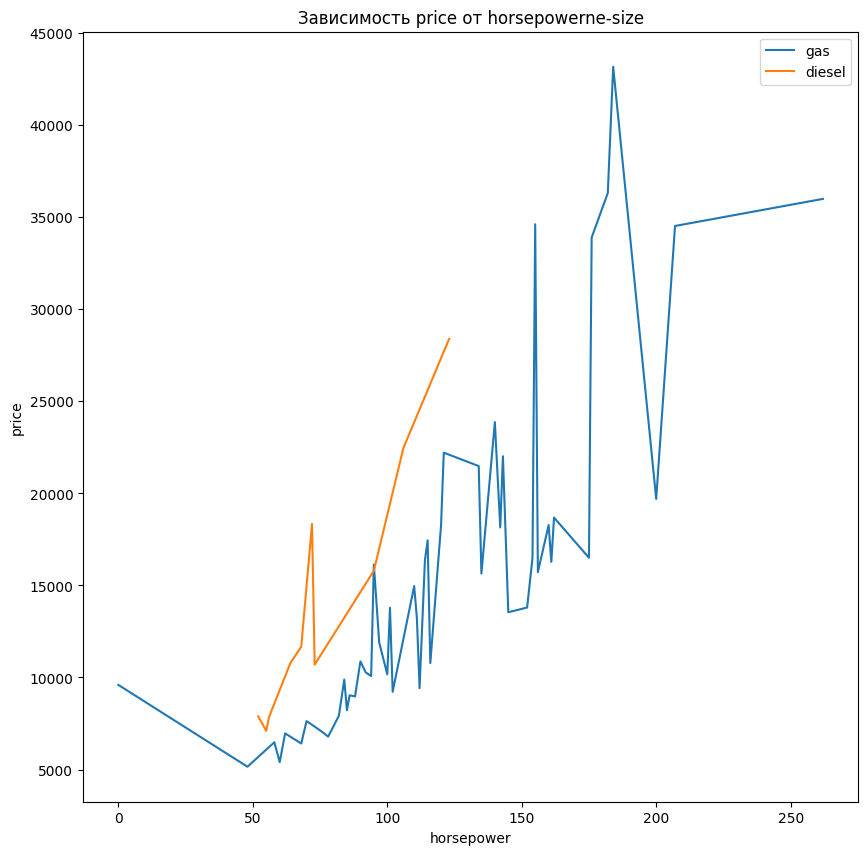

In [8]:
from numpy import mean
from numpy import std


# prepare data
data10 = fall[ fall['fuel-type']=='gas']['price']
data11 = fall[fall['fuel-type']=='diesel']['price']
data20 = fall[ fall['fuel-type']=='gas']['horsepower']
data21 = fall[ fall['fuel-type']=='diesel']['horsepower']
# summarize
print('data10: mean=%.3f stdv=%.3f' % (mean(data10), std(data10)))
print('data20: mean=%.3f stdv=%.3f' % (mean(data20), std(data20)))

print('data11: mean=%.3f stdv=%.3f' % (mean(data11), std(data11)))
print('data21: mean=%.3f stdv=%.3f' % (mean(data21), std(data21)))
# plot
plt.figure(figsize=[10,10])
plt.scatter(data10, data20)
plt.scatter(data11, data21)
plt.title('price та horsepowerne-size')
plt.xlabel('price')
plt.ylabel('horsepower')
plt.legend(['gas','diesel'])

plt.show()


fall1=fall.groupby(["fuel-type"], as_index=False)["price"].count()
print(fall1)

data_1=fall[ fall['fuel-type']=='gas'].groupby(["horsepower"], as_index=False)["price"].mean()

data_2=fall[ fall['fuel-type']=='diesel'].groupby(["horsepower"], as_index=False)["price"].mean()


plt.figure(figsize=[10,10])
plt.plot(data_1['horsepower'], data_1['price'])
plt.plot(data_2['horsepower'], data_2['price'])
plt.title('Зависимость price от horsepowerne-size')
plt.ylabel('price')
plt.xlabel('horsepower')
plt.legend(['gas','diesel'])

plt.show()


  num-of-doors  count
0            ?      2
1         four    113
2          two     86


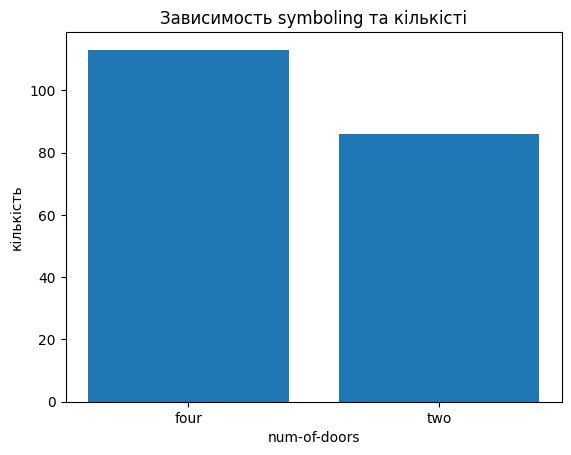

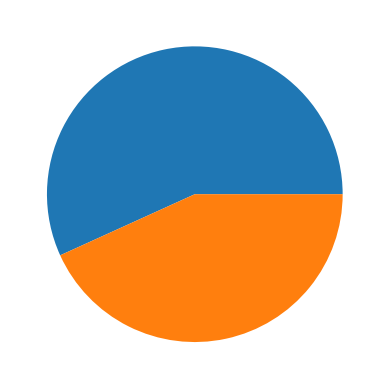

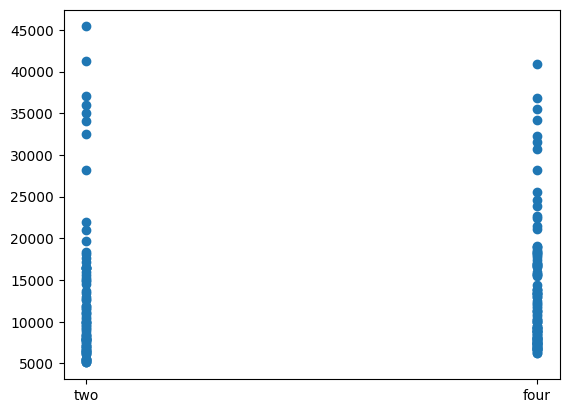

In [7]:
fall_door=fall.groupby(["num-of-doors"], as_index=False)['price'].count()

fall_door=fall.groupby(["num-of-doors"], as_index=False)['price'].agg(count='count')
print(fall_door)
# prepare data
data1 = fall_door[fall_door['num-of-doors']!='?']['num-of-doors']
data2 = fall_door[fall_door['num-of-doors']!='?']['count']

# plot
plt.title('Зависимость symboling та кількісті')
plt.xlabel('num-of-doors')
plt.ylabel('кількість')
plt.bar(data1, data2)
plt.show()

data3=fall[fall['num-of-doors']!='?']['num-of-doors'].value_counts()
plt.pie(data3)
plt.show()


data1 = fall[fall['num-of-doors']!='?']['num-of-doors']
data2 = fall[fall['num-of-doors']!='?']['price']
plt.scatter(data1, data2)
plt.show()

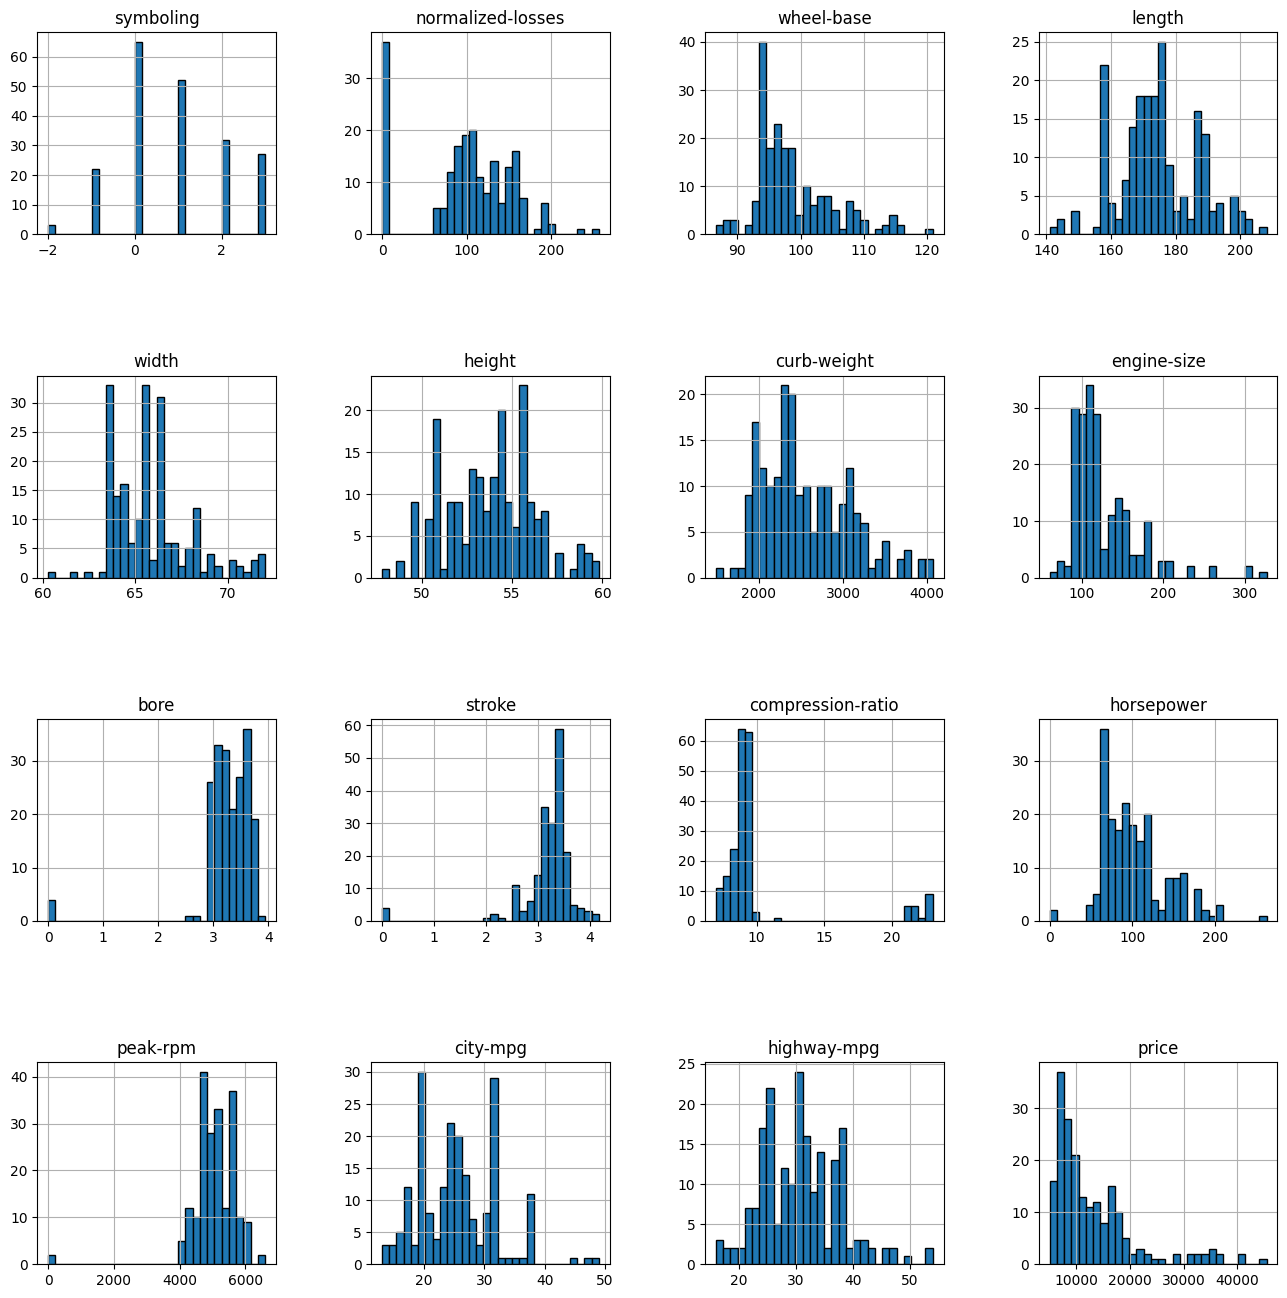

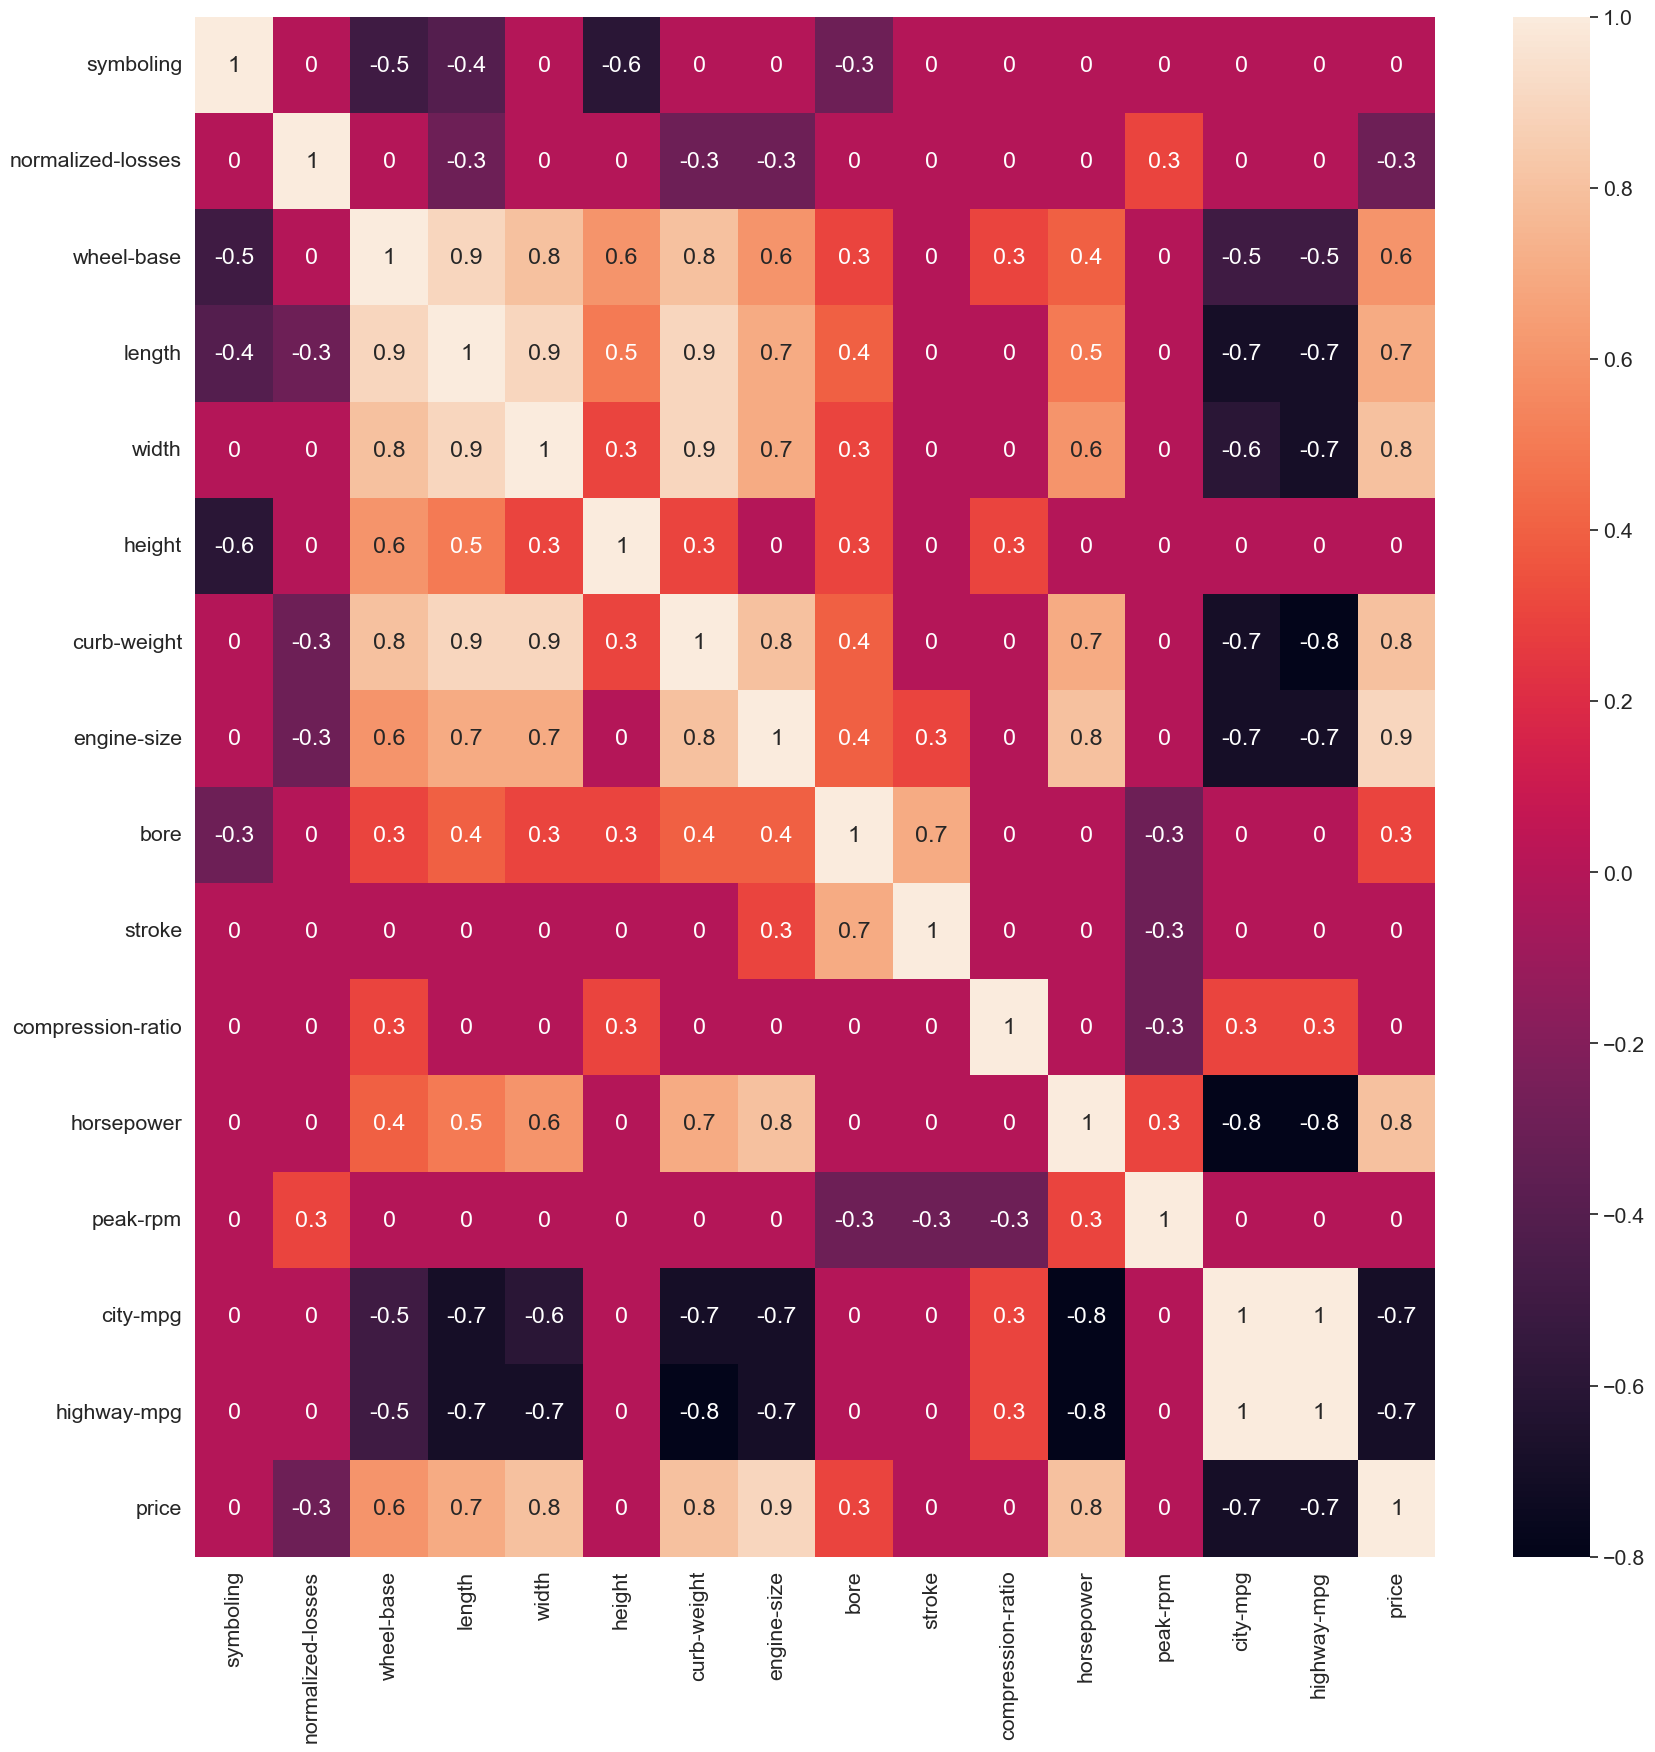

In [9]:
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as plt 
  
# generating 2-D 10x10 matrix of random numbers 
# from 1 to 100 
fall.iloc [:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]].hist(figsize=(16, 16), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.show()

sn.set(font_scale=1.4)
data = np.round(fall.iloc [:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]].corr(),1)
data[np.abs(data)<0.3]=0
#print(data)
plt.figure(figsize=[20,20])
# setting the parameter values 
annot = True
  
# plotting the heatmap 
hm = sn.heatmap(data=data, 
                annot=annot) 
  
# displaying the plotted heatmap 
plt.show()

data10: mean=12916.409 stdv=7912.973
data20: mean=125.901 stdv=42.303
data11: mean=15838.150 stdv=7563.360
data21: mean=135.700 stdv=31.302


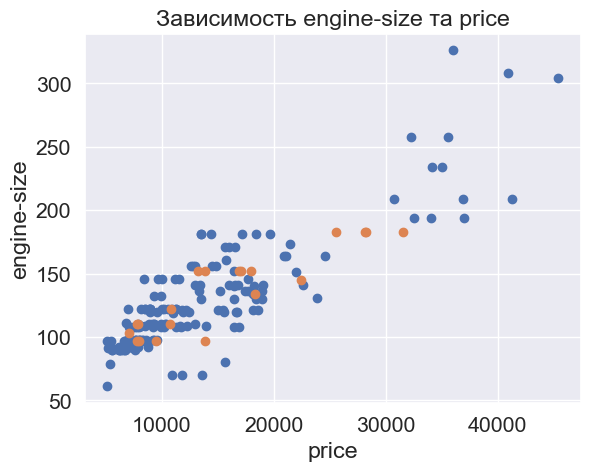

<Figure size 2000x2000 with 0 Axes>

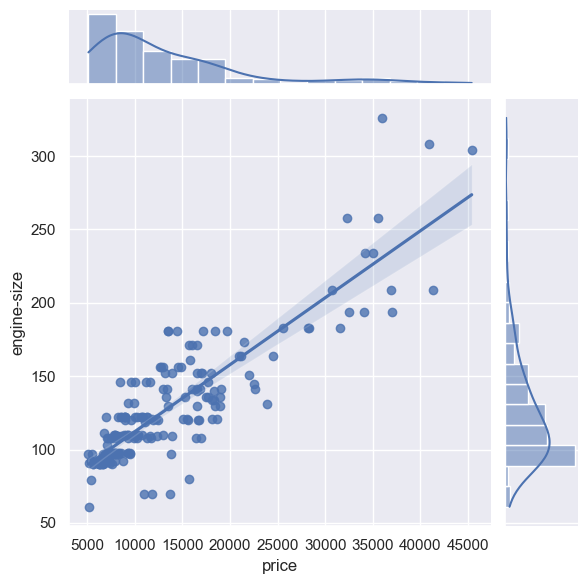

In [10]:
from numpy import mean
from numpy import std
import seaborn as sns 
import matplotlib.pyplot as plt 

# prepare data
data10 = fall[ fall['fuel-type']=='gas']['price']
data11 = fall[fall['fuel-type']=='diesel']['price']
data20 = fall[ fall['fuel-type']=='gas']['engine-size']
data21 = fall[ fall['fuel-type']=='diesel']['engine-size']
# summarize
print('data10: mean=%.3f stdv=%.3f' % (mean(data10), std(data10)))
print('data20: mean=%.3f stdv=%.3f' % (mean(data20), std(data20)))

print('data11: mean=%.3f stdv=%.3f' % (mean(data11), std(data11)))
print('data21: mean=%.3f stdv=%.3f' % (mean(data21), std(data21)))
# plot
plt.title('Зависимость engine-size та price')
plt.xlabel('price')
plt.ylabel('engine-size')
plt.scatter(data10, data20)
plt.scatter(data11, data21)
plt.show()




sns.set(font_scale=1)
# draw jointplot with 
# scatter kind 
plt.figure(figsize=[20,20])
data=fall[["price","engine-size"]] 
sns.jointplot(y = "engine-size", x = "price", kind = 'reg', data = data) 
#grid.fig.set_figwidth(20)
#grid.fig.set_figheight(20)
#grid = sns.jointplot( x = "fuel-type", y = "price", kind = 'reg', data = data ,dropna = True) 
# show the plot 
plt.show() 

data10: mean=12916.409 stdv=7912.973
data20: mean=24.613 stdv=6.147
data11: mean=15838.150 stdv=7563.360
data21: mean=30.300 stdv=6.443


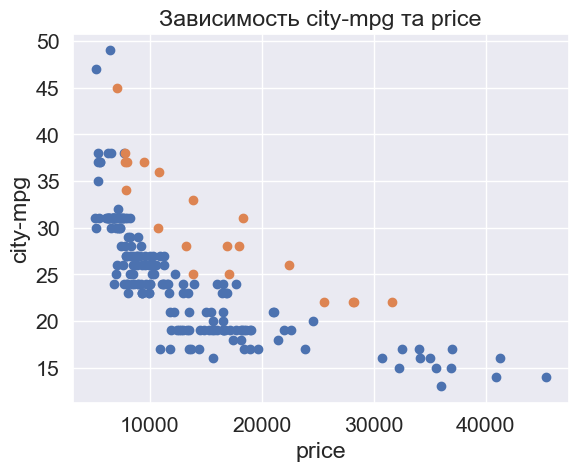

<Figure size 2000x2000 with 0 Axes>

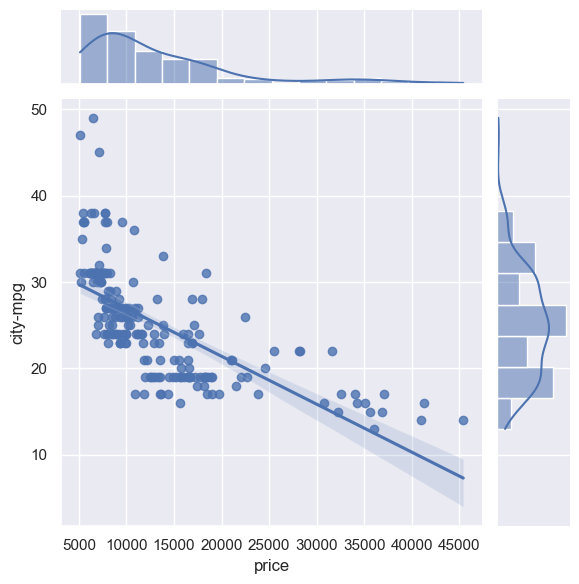

In [10]:
from numpy import mean
from numpy import std
import seaborn as sns 
import matplotlib.pyplot as plt 

# prepare data
data10 = fall[ fall['fuel-type']=='gas']['price']
data11 = fall[fall['fuel-type']=='diesel']['price']
data20 = fall[ fall['fuel-type']=='gas']['city-mpg']
data21 = fall[ fall['fuel-type']=='diesel']['city-mpg']
# summarize
print('data10: mean=%.3f stdv=%.3f' % (mean(data10), std(data10)))
print('data20: mean=%.3f stdv=%.3f' % (mean(data20), std(data20)))

print('data11: mean=%.3f stdv=%.3f' % (mean(data11), std(data11)))
print('data21: mean=%.3f stdv=%.3f' % (mean(data21), std(data21)))
# plot
plt.title('Зависимость city-mpg та price')
plt.xlabel('price')
plt.ylabel('city-mpg')
plt.scatter(data10, data20)
plt.scatter(data11, data21)
plt.show()




sns.set(font_scale=1)
# draw jointplot with 
# scatter kind 
plt.figure(figsize=[20,20])
data=fall[["price","city-mpg"]] 
sns.jointplot(y = "city-mpg", x = "price", kind = 'reg', data = data) 
#grid.fig.set_figwidth(20)
#grid.fig.set_figheight(20)
#grid = sns.jointplot( x = "fuel-type", y = "price", kind = 'reg', data = data ,dropna = True) 
# show the plot 
plt.show() 

In [11]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# create some synthesized dataset




train_set = fall[["price","engine-size","normalized-losses"]].corr().to_numpy()
#np.array([[1,2,3],[1,4,7],[1,4,9]]) # the first feature have zero variance
# array([[1, 2, 3],
#        [1, 4, 7],
#        [1, 4, 9]])
print(train_set )
test_set = fall[["price","engine-size","symboling"]].corr().to_numpy()
# np.array([[3,2,3],[1,2,7]]) # the second feature have zero variance
# array([[3, 2, 3],
#        [1, 2, 7]])
print("i m")
print(test_set)
selector = VarianceThreshold()
selector.fit(train_set) # fit on trainset
transformed_train = selector.transform(train_set) # transform train set
# the first feature has been removed
# array([[2, 3],
#        [4, 7],
#        [4, 9]])
print(transformed_train)
transformed_test = selector.transform(test_set) # transform test set
# array([[2, 3],
#        [2, 7]])
# although in the test set the second features has zero variance
# but according to train set, we should remove the first feature only
print(transformed_test)

[[ 1.          0.87233517 -0.30817597]
 [ 0.87233517  1.         -0.31264001]
 [-0.30817597 -0.31264001  1.        ]]
i m
[[ 1.          0.87233517 -0.08239119]
 [ 0.87233517  1.         -0.11058056]
 [-0.08239119 -0.11058056  1.        ]]
[[ 1.          0.87233517 -0.30817597]
 [ 0.87233517  1.         -0.31264001]
 [-0.30817597 -0.31264001  1.        ]]
[[ 1.          0.87233517 -0.08239119]
 [ 0.87233517  1.         -0.11058056]
 [-0.08239119 -0.11058056  1.        ]]


The absolute value of the correlation between the symboling feature and price is 0.08,p-value is 0.245
The absolute value of the correlation between the normalized-losses feature and price is 0.31,p-value is 0.0
The absolute value of the correlation between the wheel-base feature and price is 0.58,p-value is 0.0
The absolute value of the correlation between the length feature and price is 0.69,p-value is 0.0
The absolute value of the correlation between the width feature and price is 0.75,p-value is 0.0
The absolute value of the correlation between the height feature and price is 0.14,p-value is 0.055
The absolute value of the correlation between the curb-weight feature and price is 0.83,p-value is 0.0
The absolute value of the correlation between the engine-size feature and price is 0.87,p-value is 0.0
The absolute value of the correlation between the bore feature and price is 0.27,p-value is 0.0
The absolute value of the correlation between the stroke feature and price is 0.05,p-valu

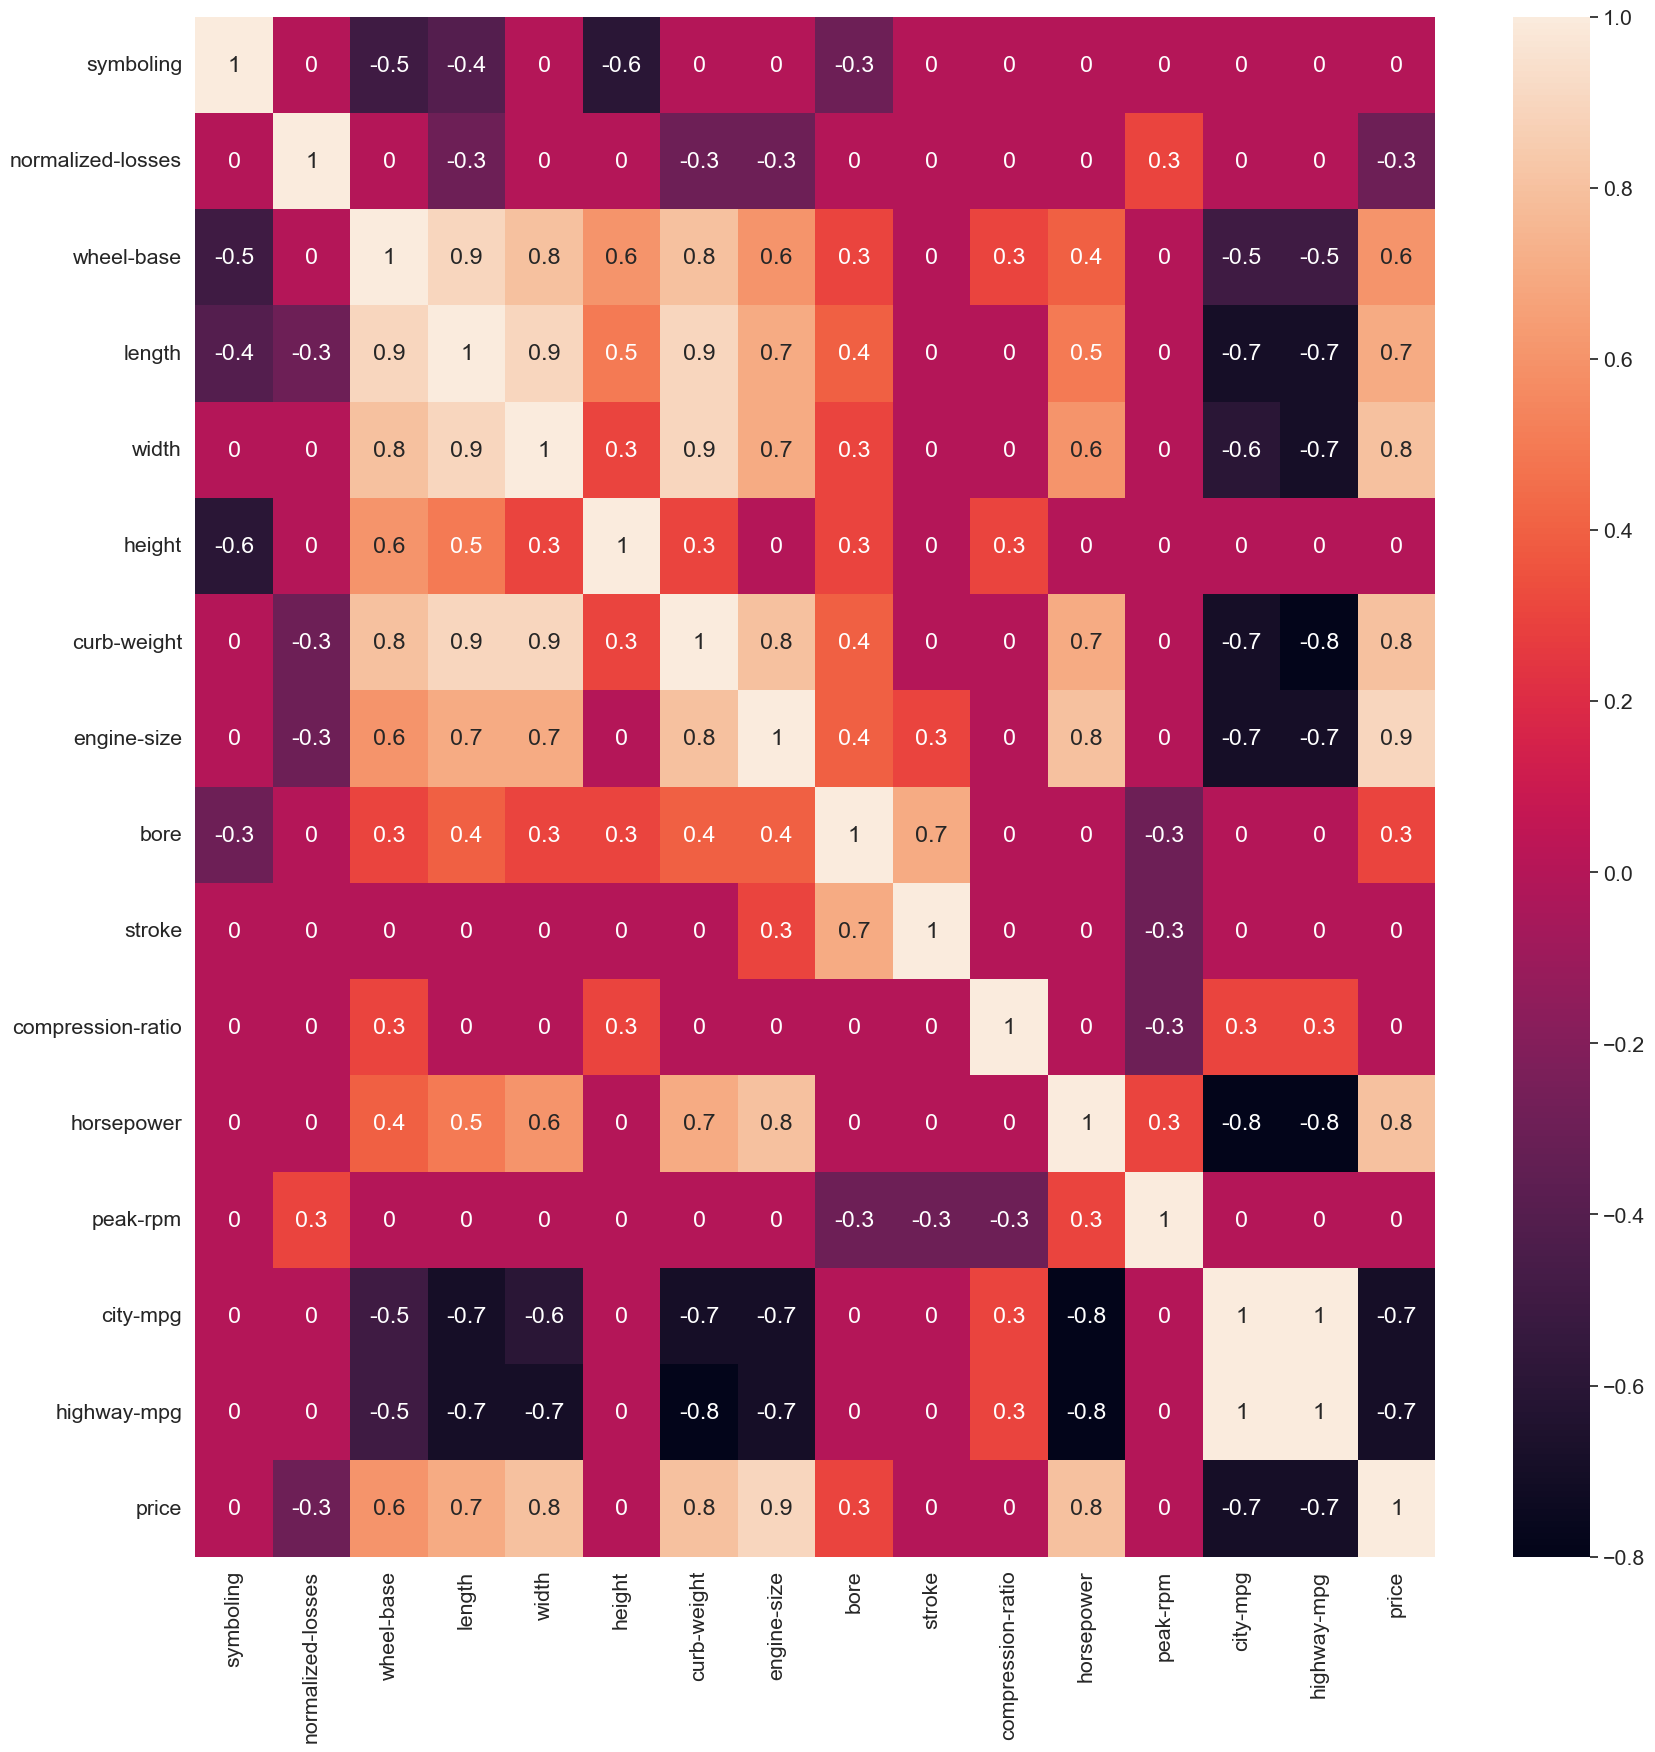

In [12]:
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import norm 
from sklearn.feature_selection import SelectKBest

# load dataset
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target # use california_housing dataset as example
X=fall.iloc [:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]]
y=fall["price"].astype(float)
for idx in X.columns: #range(train_set.shape[1]):
    pea_score, p_value = pearsonr(X[idx], y)
    print(f"The absolute value of the correlation between the {idx} feature and price is {round(np.abs(pea_score),2)},p-value is {round(p_value,3)}")
# so we should select the 1st and 7th features
def udf_pearsonr(X1, y1):
    result = [pearsonr(X1[column], y1)[0] for column in X1.columns]  # list of pearsonr
    return result    

sn.set(font_scale=1.4)

data = np.round(pd.DataFrame(X.apply(lambda column: udf_pearsonr(X, column)).values.tolist(), 
                                  columns=X.columns, index=X.columns),1)


    

data[np.abs(data)<0.3]=0
#print(data)
plt.figure(figsize=[20,20])
# setting the parameter values 
annot = True
  
# plotting the heatmap 
hm = sn.heatmap(data=data, 
                annot=annot) 
  
# displaying the plotted heatmap 
plt.show() 

In [14]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# validate the result
for idx in X.columns:
    score, p_value = f_regression(X[idx].to_numpy().reshape(-1,1), y)
    print(f"The F-Score between the {idx} feature and price is {round(score[0],2)}, p-value is {round(p_value[0],3)}")
# so we should select the 1st and 7th features

The F-Score between the symboling feature and price is 1.36, p-value is 0.245
The F-Score between the normalized-losses feature and price is 20.88, p-value is 0.0
The F-Score between the wheel-base feature and price is 103.34, p-value is 0.0
The F-Score between the length feature and price is 181.47, p-value is 0.0
The F-Score between the width feature and price is 257.84, p-value is 0.0
The F-Score between the height feature and price is 3.72, p-value is 0.055
The F-Score between the curb-weight feature and price is 456.14, p-value is 0.0
The F-Score between the engine-size feature and price is 633.53, p-value is 0.0
The F-Score between the bore feature and price is 16.1, p-value is 0.0
The F-Score between the stroke feature and price is 0.49, p-value is 0.484
The F-Score between the compression-ratio feature and price is 1.01, p-value is 0.316
The F-Score between the horsepower feature and price is 336.62, p-value is 0.0
The F-Score between the peak-rpm feature and price is 0.26, p-v

In [15]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# validate the result
for idx in X.columns:
    score = mutual_info_regression(X[idx].to_numpy().reshape(-1,1), y, n_neighbors = 5)
    print(f"The MI between the {idx} feature and price is {round(score[0],2)}")
# so we should select the 1st and 8th features

The MI between the symboling feature and price is 0.18
The MI between the normalized-losses feature and price is 0.19
The MI between the wheel-base feature and price is 0.48
The MI between the length feature and price is 0.58
The MI between the width feature and price is 0.65
The MI between the height feature and price is 0.22
The MI between the curb-weight feature and price is 0.93
The MI between the engine-size feature and price is 0.77
The MI between the bore feature and price is 0.41
The MI between the stroke feature and price is 0.23
The MI between the compression-ratio feature and price is 0.05
The MI between the horsepower feature and price is 0.8
The MI between the peak-rpm feature and price is 0.11
The MI between the city-mpg feature and price is 0.73
The MI between the highway-mpg feature and price is 0.82
The MI between the price feature and price is 3.59


In [16]:
import pandas as pd
sample_dict = {'Type': ['J','J','J',
                        'B','B','B',
                        'C','C','C','C','C'], 
               'Output': [0, 1, 0, 
                          2, 0, 1,  
                          0, 0, 1, 2, 2,]}
sample_raw = pd.DataFrame(sample_dict)
sample_raw = fall[["num-of-doors","body-style"]]
print(sample_raw)

    num-of-doors   body-style
0            two  convertible
1            two  convertible
2            two    hatchback
3           four        sedan
4           four        sedan
..           ...          ...
200         four        sedan
201         four        sedan
202         four        sedan
203         four        sedan
204         four        sedan

[201 rows x 2 columns]


In [17]:
sample = pd.get_dummies(sample_raw)
print(sample)
from sklearn.feature_selection import chi2
chi2(sample.values[:,[1,2,3]],sample.values[:,[0]])

     num-of-doors_?  num-of-doors_four  num-of-doors_two  \
0             False              False              True   
1             False              False              True   
2             False              False              True   
3             False               True             False   
4             False               True             False   
..              ...                ...               ...   
200           False               True             False   
201           False               True             False   
202           False               True             False   
203           False               True             False   
204           False               True             False   

     body-style_convertible  body-style_hardtop  body-style_hatchback  \
0                      True               False                 False   
1                      True               False                 False   
2                     False               False             

(array([1.13567839, 0.86432161, 0.06030151]),
 array([0.28656736, 0.35253214, 0.80602003]))

In [18]:
obs_df = sample_raw.groupby(["num-of-doors","body-style"]).size().reset_index()
obs_df.columns = ["num-of-doors","body-style",'Count']
obs_df

,num-of-doors,body-style,Count
0,?,sedan,2
1,four,hatchback,10
2,four,sedan,78
3,four,wagon,25
4,two,convertible,6
5,two,hardtop,8
6,two,hatchback,58
7,two,sedan,14


In [19]:
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# load the dataset
from sklearn.datasets import load_iris # use iris dataset
iris = load_iris()
X, y = iris.data, iris.target
X=fall.iloc [:, [0,1,9,10,11,12,13,16,18,19,20,21,22,23,24,25]]
y=fall["price"]
# in this dataset, X is continuous variable, y is categorical variable
# does not meet the chi2 requirement 

# convert to categorical data by converting data to booleans
# as demo, convert continuous variable to booleans by whether the value is greater than mean
X = X > X.mean(0)

# before using iris dataset, we need to shuffle the dataset first



# validate the result
for idx in X.columns:
    score, p_value = chi2(X[idx].to_numpy().reshape(-1,1), y)
    print(f"The ch2 statistics between the {idx} feature and price is {round(score[0],2)}, p-value is {round(p_value[0],3)}")
# so we should select the 3rd and 4th features 

The ch2 statistics between the symboling feature and price is 85.47, p-value is 1.0
The ch2 statistics between the normalized-losses feature and price is 83.47, p-value is 1.0
The ch2 statistics between the wheel-base feature and price is 119.46, p-value is 1.0
The ch2 statistics between the length feature and price is 108.9, p-value is 1.0
The ch2 statistics between the width feature and price is 113.64, p-value is 1.0
The ch2 statistics between the height feature and price is 91.18, p-value is 1.0
The ch2 statistics between the curb-weight feature and price is 117.77, p-value is 1.0
The ch2 statistics between the engine-size feature and price is 126.62, p-value is 1.0
The ch2 statistics between the bore feature and price is 85.47, p-value is 1.0
The ch2 statistics between the stroke feature and price is 73.76, p-value is 1.0
The ch2 statistics between the compression-ratio feature and price is 170.43, p-value is 0.771
The ch2 statistics between the horsepower feature and price is 122

In [20]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# validate the result
for idx in X.columns:
    score, p_value = f_classif(X[idx].to_numpy().reshape(-1,1), y)
    print(f"The ANOVA F-Score between the {idx} feature and price is {round(score[0],2)}, p-value is {round(p_value[0],3)}")
# so we should select the 3rd and 4th features

The ANOVA F-Score between the symboling feature and price is 1.5299999713897705, p-value is 0.17299999296665192
The ANOVA F-Score between the normalized-losses feature and price is 1.9199999570846558, p-value is 0.0729999989271164
The ANOVA F-Score between the wheel-base feature and price is 3.809999942779541, p-value is 0.0020000000949949026
The ANOVA F-Score between the length feature and price is 7.989999771118164, p-value is 0.0
The ANOVA F-Score between the width feature and price is 3.9000000953674316, p-value is 0.0020000000949949026
The ANOVA F-Score between the height feature and price is 2.619999885559082, p-value is 0.017000000923871994
The ANOVA F-Score between the curb-weight feature and price is 7.789999961853027, p-value is 0.0
The ANOVA F-Score between the engine-size feature and price is 7.460000038146973, p-value is 0.0
The ANOVA F-Score between the bore feature and price is 1.5299999713897705, p-value is 0.17299999296665192
The ANOVA F-Score between the stroke featur

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [21]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.datasets import load_iris # use iris dataset as example

# validate the result
for idx in X.columns:
    score = mutual_info_classif(X[idx].to_numpy().reshape(-1,1), y, n_neighbors = 5)
    print(f"The MI between the {idx} feature and price is {round(score[0],2)}")
# so we should select the 3rd and 4th features

The MI between the symboling feature and price is 0.63
The MI between the normalized-losses feature and price is 1.27
The MI between the wheel-base feature and price is 0.66
The MI between the length feature and price is 0.62
The MI between the width feature and price is 0.2
The MI between the height feature and price is 0.51
The MI between the curb-weight feature and price is 0.25
The MI between the engine-size feature and price is 0.65
The MI between the bore feature and price is 0.3
The MI between the stroke feature and price is 0.28
The MI between the compression-ratio feature and price is 0
The MI between the horsepower feature and price is 1.33
The MI between the peak-rpm feature and price is 1.77
The MI between the city-mpg feature and price is 1.9
The MI between the highway-mpg feature and price is 1.53
The MI between the price feature and price is 0.98
